Use the right version, since load_boston dataset posed ethical concerns, so it was removed

In [12]:
%pip install --upgrade scikit-learn==0.23.0


  Using cached scikit-learn-0.23.0.tar.gz (7.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'


  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [340 lines of output]
      Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_system != "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.6" and platform_system == "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_system == "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version >= "3.8" and platform_system == "AIX"' don't match your environment
        Using cached setuptools-71.1.0-py3-none-any.whl.metadata (6.6 kB)
        Using cached wheel-0.43.0-py3-none-any.whl.metadata (2.2 kB)
        Using cached Cython-3.0.10-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
        Using cached numpy-1.17.3.zip (6.4 MB)


In [13]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In case, the above method doesn't work. Use this alternative method to get the data

In [5]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Amirah\AppData\Local\Temp\ipykernel_17620\3257800236.py:5: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [19]:
# view the data
display(data.shape)
display(target.shape)

(506, 13)

(506,)

We can apply the models.

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

mod = LinearRegression()
mod.fit(data, target)
mod.predict(data)[:3]

array([30.00384338, 25.02556238, 30.56759672])

In [29]:
mod = KNeighborsRegressor()
mod.fit(data, target)
mod.predict(data)[:3]

array([21.78, 22.9 , 25.36])

Maybe we should check the data

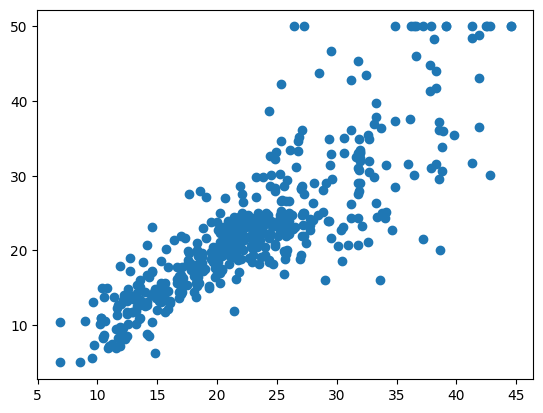

In [30]:
import matplotlib.pyplot as plt

mod = KNeighborsRegressor().fit(data, target)
pred = mod.predict(data)
plt.scatter(pred, target)

Notice the scale of the x-axis and the y-axis are different. We can scale this.

Let's wrap it into a pipeline

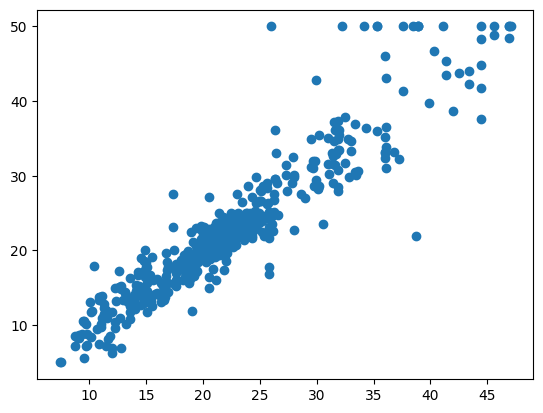

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])
pred = pipe.fit(data, target).predict(data)
plt.scatter(pred, target)

Let's apply some settings

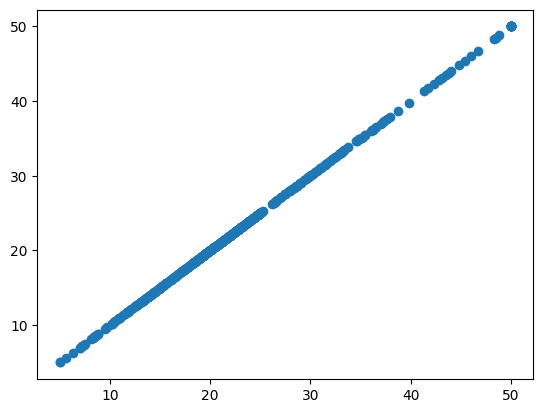

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# If n_neighbors = 1, we're predicting based on the closest neightbor (n=1), since we're testing using the same learning data, we're cheating and making a perfect prediction
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])
pred = pipe.fit(data, target).predict(data)
plt.scatter(pred, target)

Let's use a gridsearch to figure out the best setting for the model parameter - how to figure out how many appropriate neighbours?

In [38]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=1))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pred

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])

mod = GridSearchCV(
    estimator=pipe,
    param_grid= {
        'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10]
    },
    cv=3
)

mod.fit(data, target)
pd.DataFrame(mod.cv_results_)

c:\Users\Amirah\Python_Projects\scikit-learn\.venv\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003185,7.326343e-04,0.004752,0.000781,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.003484,6.618974e-04,0.008444,0.003301,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.002926,1.615853e-03,0.006117,0.002558,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.001711,2.438936e-04,0.004334,0.002880,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.003108,1.141538e-03,0.006390,0.001270,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.002060,4.246717e-04,0.003675,0.001953,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.001891,5.099564e-04,0.003106,0.000790,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.001711,6.531388e-04,0.003261,0.000664,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.001714,4.921094e-04,0.002931,0.000513,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.001541,4.899036e-07,0.002740,0.000246,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4
